In [ ]:
# !pip install langgraph langsmith langchain_groq langchain_community

In [ ]:
groq_api_key = key

In [5]:
from langchain_groq import ChatGroq

In [ ]:
LANGSMITH_API_KEY= key

In [7]:
llm = ChatGroq(groq_api_key = groq_api_key, model_name = "gemma2-9b-it")

In [10]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END

In [11]:
class State(TypedDict):
  messages:Annotated[list,add_messages]
graph_builder = StateGraph(State)

In [12]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [13]:
graph_builder.add_node('chatbot',chatbot)

In [14]:
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)

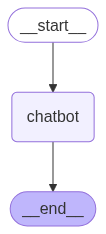

In [16]:
graph_builder.compile()

In [17]:
graph = graph_builder.compile()

In [21]:
while True:
  user_input = input("user:")
  if user_input.lower() in ['quit','q']:
    print('Good Bye, Thank you for using LangGraph Framwork.')
    break
  for event in graph.stream({'messages':('user', user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print('Assistant:', value['messages'].content)

user:mcp vs a2a agents
dict_values([{'messages': AIMessage(content='Let\'s break down the differences between MCP and A2A agents in the context of reinforcement learning (RL).\n\n**MCP (Multi-Category Policy)**\n\n* **Focus:** Primarily used in scenarios with discrete action spaces (e.g., selecting one action from a finite set).\n* **Mechanism:**  MCP agents learn a policy that directly maps observations (states) to individual actions. \n* **Training:** Typically trained using methods like policy gradient algorithms (e.g., REINFORCE, PPO), where the agent learns to maximize the expected reward for taking specific actions in different states.\n* **Flexibility:**  More suited for environments with a clear separation between possible actions.\n\n**A2A (Actor-Critic)**\n\n* **Focus:** General purpose, applicable to both discrete and continuous action spaces.\n* **Architecture:** Employs two key components:\n    * **Actor:** The "policy network" that learns to select actions based on the cu